# INICIALIZACIÓN Y CARGA DE DATOS

In [ ]:
# Importación de librerias
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import corrcoef, transpose, arange
from google.colab import files
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn import preprocessing

seed = 73  # Semilla aleatoria arbitraria y constante

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [ ]:
# Upload dataset
data = upload_files()
print(data.shape)
data.head()

Saving wdbc.data to wdbc.data
User uploaded file "wdbc.data" with length 124520 bytes
(569, 32)


idnumber diagnosis  meanRadius  meanTexture  meanPerimeter  meanArea  \
0    842302         M       17.99        10.38         122.80    1001.0   
1    842517         M       20.57        17.77         132.90    1326.0   
2  84300903         M       19.69        21.25         130.00    1203.0   
3  84348301         M       11.42        20.38          77.58     386.1   
4  84358402         M       20.29        14.34         135.10    1297.0   

   meanSmoothness  meanCompactness  meanConcavity  meanConcavePoints  ...  \
0         0.11840          0.27760         0.3001            0.14710  ...   
1         0.08474          0.07864         0.0869            0.07017  ...   
2         0.10960          0.15990         0.1974            0.12790  ...   
3         0.14250          0.28390         0.2414            0.10520  ...   
4         0.10030          0.13280         0.1980            0.10430  ...   

   worstRadius  worstTexture  worstPerimeter  worstArea  wortsSmoothness  \
0        25.38         17.33          184.60     2019.0           0.1622   
1        24.99         23.41          158.80     1956.0           0.1238   
2        23.57         25.53          152.50     1709.0           0.1444   
3        14.91         26.50           98.87      567.7           0.2098   
4        22.54         16.67          152.20     1575.0           0.1374   

   worstCompactness  worstConcavity  worstConcavePoints  worstSymetry  \
0            0.6656          0.7119              0.2654        0.4601   
1            0.1866          0.2416              0.1860        0.2750   
2            0.4245          0.4504              0.2430        0.3613   
3            0.8663          0.6869              0.2575        0.6638   
4            0.2050          0.4000              0.1625        0.2364   

   worstFractalDim  
0          0.11890  
1          0.08902  
2          0.08758  
3          0.17300  
4          0.07678  

[5 rows x 32 columns]

# EXPLORACIÓN

In [ ]:
# Se calcula el porcentaje medio de valores vacios para cada columna
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

idnumber - 0%
diagnosis - 0%
meanRadius - 0%
meanTexture - 0%
meanPerimeter - 0%
meanArea - 0%
meanSmoothness - 0%
meanCompactness - 0%
meanConcavity - 0%
meanConcavePoints - 0%
meanSymetry - 0%
meanFractalDim - 0%
radiusSE - 0%
textureSE - 0%
perimeterSE - 0%
areaSE - 0%
smoothnessSE - 0%
compactnessSE - 0%
concavitySE - 0%
concavePointsSE - 0%
symetrySE - 0%
fractalDimSE - 0%
worstRadius - 0%
worstTexture - 0%
worstPerimeter - 0%
worstArea - 0%
wortsSmoothness - 0%
worstCompactness - 0%
worstConcavity - 0%
worstConcavePoints - 0%
worstSymetry - 0%
worstFractalDim - 0%


In [ ]:
#exploración valores atípicos
data1 = data.iloc[:,2:12]
data2 = data.iloc[:,12:22]
data3= data.iloc[:,22:32]

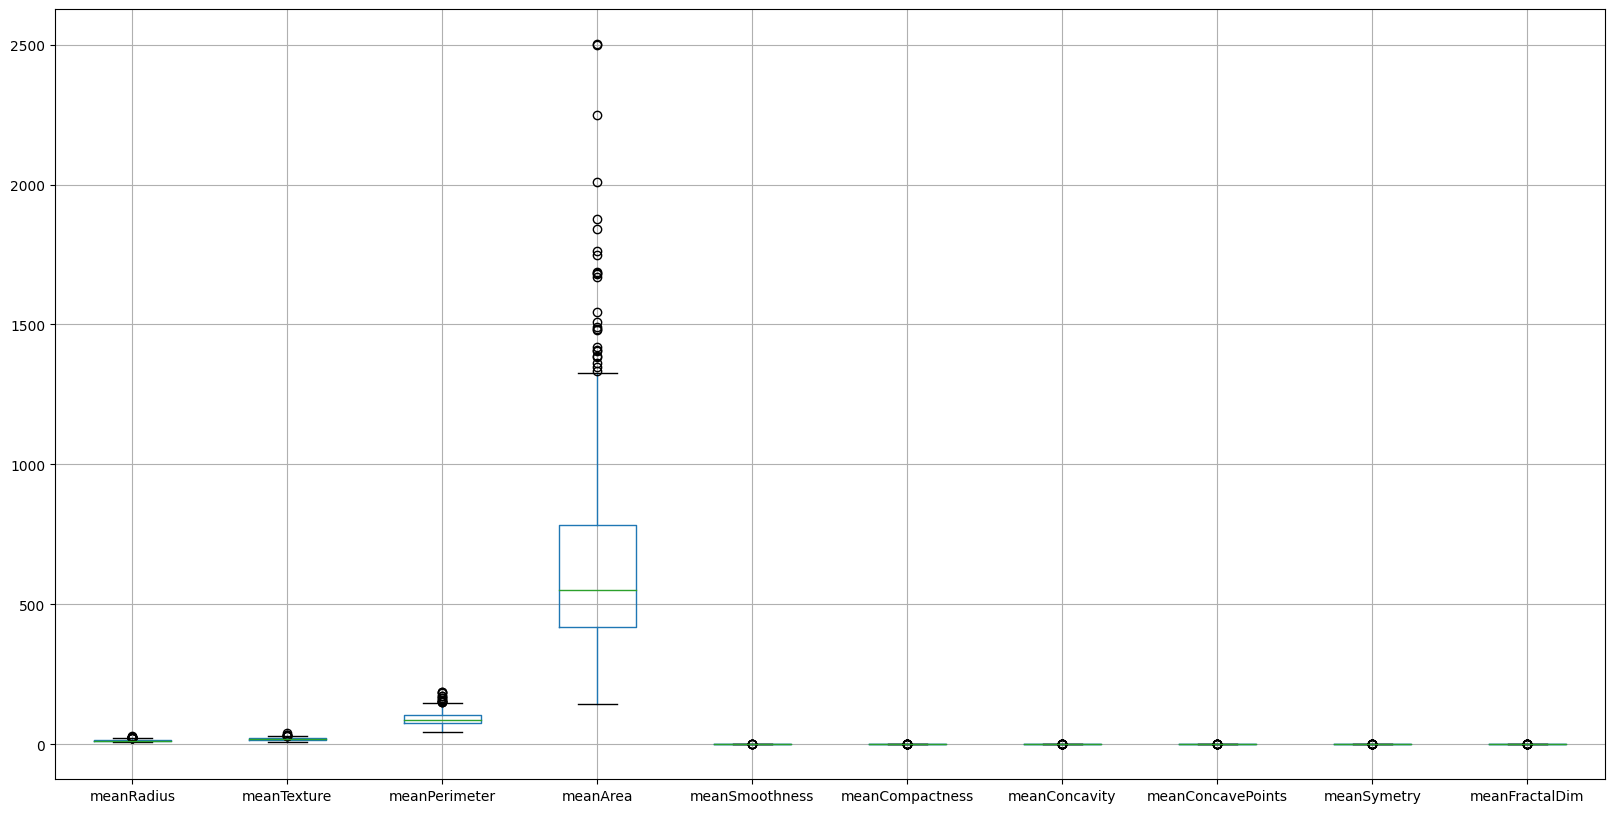

In [ ]:
data1.boxplot(figsize=(20,10))
plt.show()

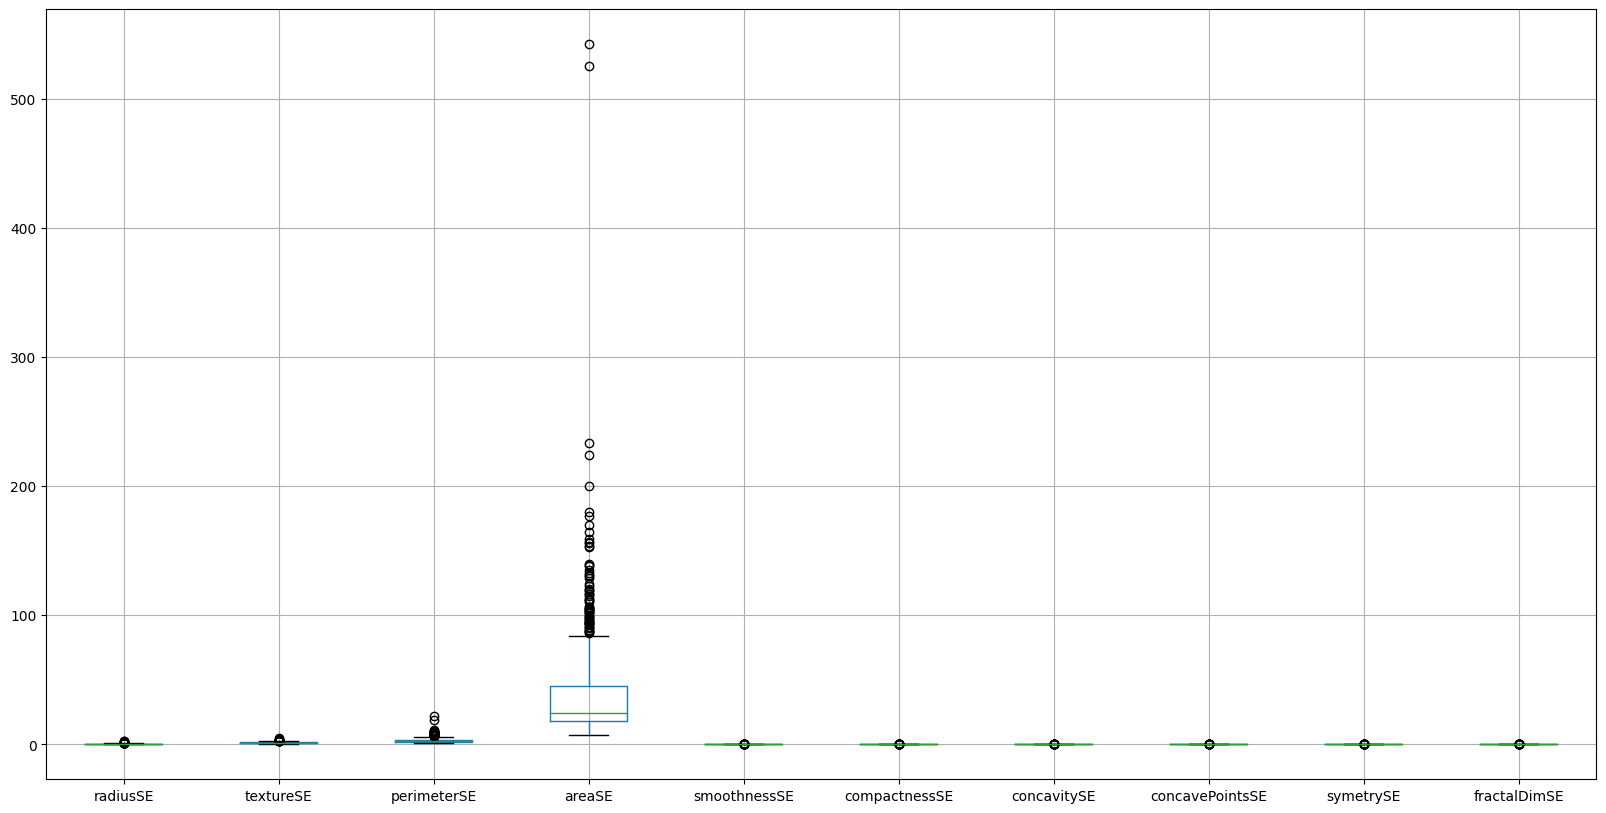

In [ ]:
data2.boxplot(figsize=(20,10))
plt.show()

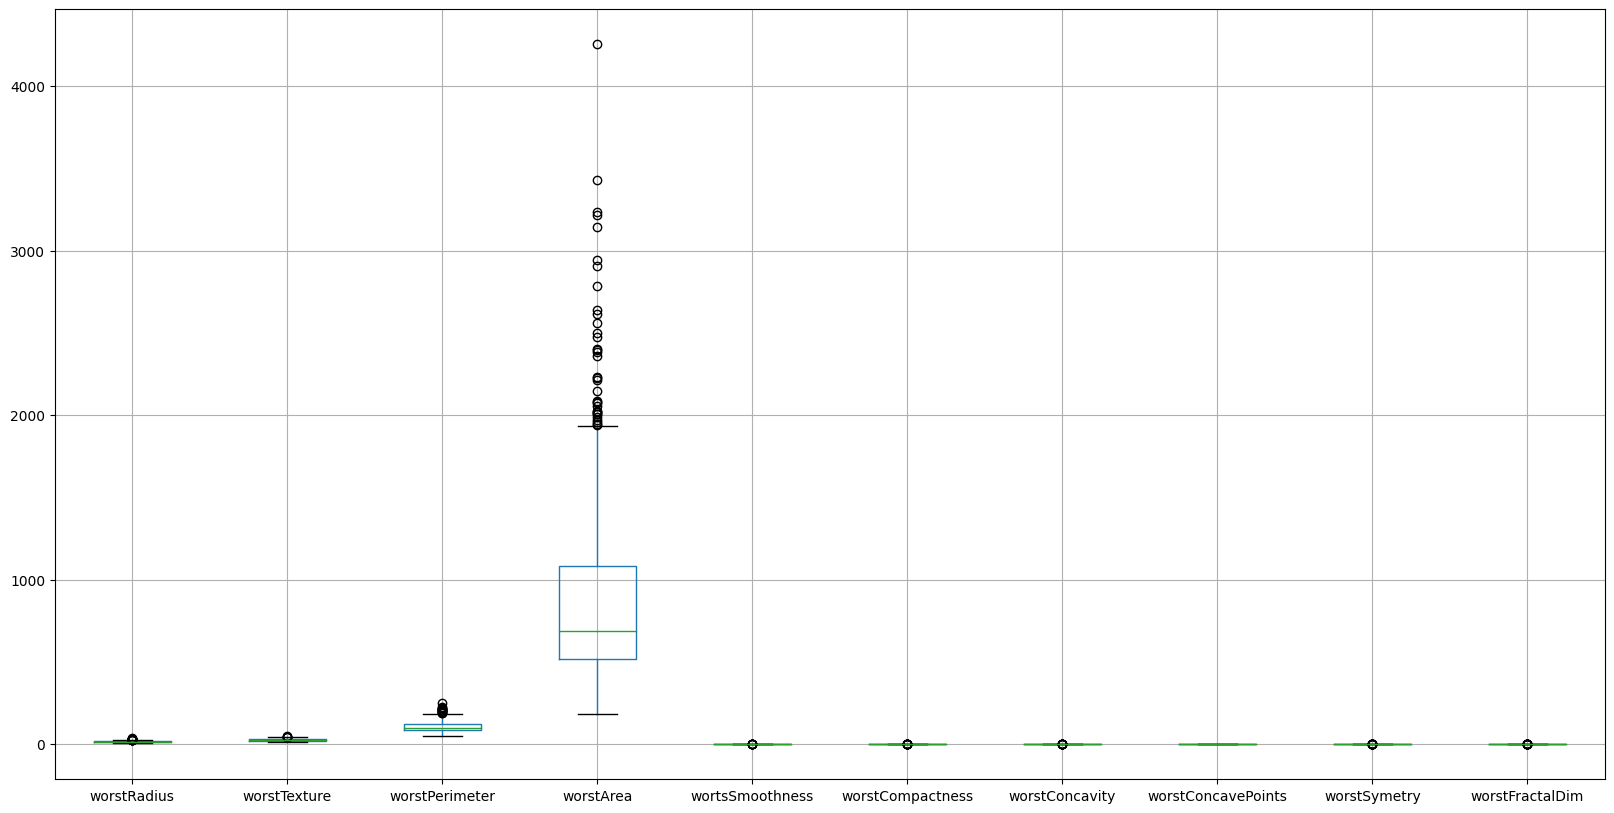

In [ ]:
data3.boxplot(figsize=(20,10))
plt.show()

In [ ]:
#se binariza la variable diagnostico para que sea numérica en vez de categórica
lb = preprocessing.LabelBinarizer()

data['diagnosis_bin']=lb.fit_transform(data['diagnosis'])

data.tail()

idnumber diagnosis  meanRadius  meanTexture  meanPerimeter  meanArea  \
564    926424         M       21.56        22.39         142.00    1479.0   
565    926682         M       20.13        28.25         131.20    1261.0   
566    926954         M       16.60        28.08         108.30     858.1   
567    927241         M       20.60        29.33         140.10    1265.0   
568     92751         B        7.76        24.54          47.92     181.0   

     meanSmoothness  meanCompactness  meanConcavity  meanConcavePoints  ...  \
564         0.11100          0.11590        0.24390            0.13890  ...   
565         0.09780          0.10340        0.14400            0.09791  ...   
566         0.08455          0.10230        0.09251            0.05302  ...   
567         0.11780          0.27700        0.35140            0.15200  ...   
568         0.05263          0.04362        0.00000            0.00000  ...   

     worstTexture  worstPerimeter  worstArea  wortsSmoothness  \
564         26.40          166.10     2027.0          0.14100   
565         38.25          155.00     1731.0          0.11660   
566         34.12          126.70     1124.0          0.11390   
567         39.42          184.60     1821.0          0.16500   
568         30.37           59.16      268.6          0.08996   

     worstCompactness  worstConcavity  worstConcavePoints  worstSymetry  \
564           0.21130          0.4107              0.2216        0.2060   
565           0.19220          0.3215              0.1628        0.2572   
566           0.30940          0.3403              0.1418        0.2218   
567           0.86810          0.9387              0.2650        0.4087   
568           0.06444          0.0000              0.0000        0.2871   

     worstFractalDim  diagnosis_bin  
564          0.07115              1  
565          0.06637              1  
566          0.07820              1  
567          0.12400              1  
568          0.07039              0  

[5 rows x 33 columns]

In [ ]:
data.describe()

idnumber  meanRadius  meanTexture  meanPerimeter     meanArea  \
count  5.690000e+02  569.000000   569.000000     569.000000   569.000000   
mean   3.037183e+07   14.127292    19.289649      91.969033   654.889104   
std    1.250206e+08    3.524049     4.301036      24.298981   351.914129   
min    8.670000e+03    6.981000     9.710000      43.790000   143.500000   
25%    8.692180e+05   11.700000    16.170000      75.170000   420.300000   
50%    9.060240e+05   13.370000    18.840000      86.240000   551.100000   
75%    8.813129e+06   15.780000    21.800000     104.100000   782.700000   
max    9.113205e+08   28.110000    39.280000     188.500000  2501.000000   

       meanSmoothness  meanCompactness  meanConcavity  meanConcavePoints  \
count      569.000000       569.000000     569.000000         569.000000   
mean         0.096360         0.104341       0.088799           0.048919   
std          0.014064         0.052813       0.079720           0.038803   
min          0.052630         0.019380       0.000000           0.000000   
25%          0.086370         0.064920       0.029560           0.020310   
50%          0.095870         0.092630       0.061540           0.033500   
75%          0.105300         0.130400       0.130700           0.074000   
max          0.163400         0.345400       0.426800           0.201200   

       meanSymetry  ...  worstTexture  worstPerimeter    worstArea  \
count   569.000000  ...    569.000000      569.000000   569.000000   
mean      0.181162  ...     25.677223      107.261213   880.583128   
std       0.027414  ...      6.146258       33.602542   569.356993   
min       0.106000  ...     12.020000       50.410000   185.200000   
25%       0.161900  ...     21.080000       84.110000   515.300000   
50%       0.179200  ...     25.410000       97.660000   686.500000   
75%       0.195700  ...     29.720000      125.400000  1084.000000   
max       0.304000  ...     49.540000      251.200000  4254.000000   

       wortsSmoothness  worstCompactness  worstConcavity  worstConcavePoints  \
count       569.000000        569.000000      569.000000          569.000000   
mean          0.132369          0.254265        0.272188            0.114606   
std           0.022832          0.157336        0.208624            0.065732   
min           0.071170          0.027290        0.000000            0.000000   
25%           0.116600          0.147200        0.114500            0.064930   
50%           0.131300          0.211900        0.226700            0.099930   
75%           0.146000          0.339100        0.382900            0.161400   
max           0.222600          1.058000        1.252000            0.291000   

       worstSymetry  worstFractalDim  diagnosis_bin  
count    569.000000       569.000000     569.000000  
mean       0.290076         0.083946       0.372583  
std        0.061867         0.018061       0.483918  
min        0.156500         0.055040       0.000000  
25%        0.250400         0.071460       0.000000  
50%        0.282200         0.080040       0.000000  
75%        0.317900         0.092080       1.000000  
max        0.663800         0.207500       1.000000  

[8 rows x 32 columns]

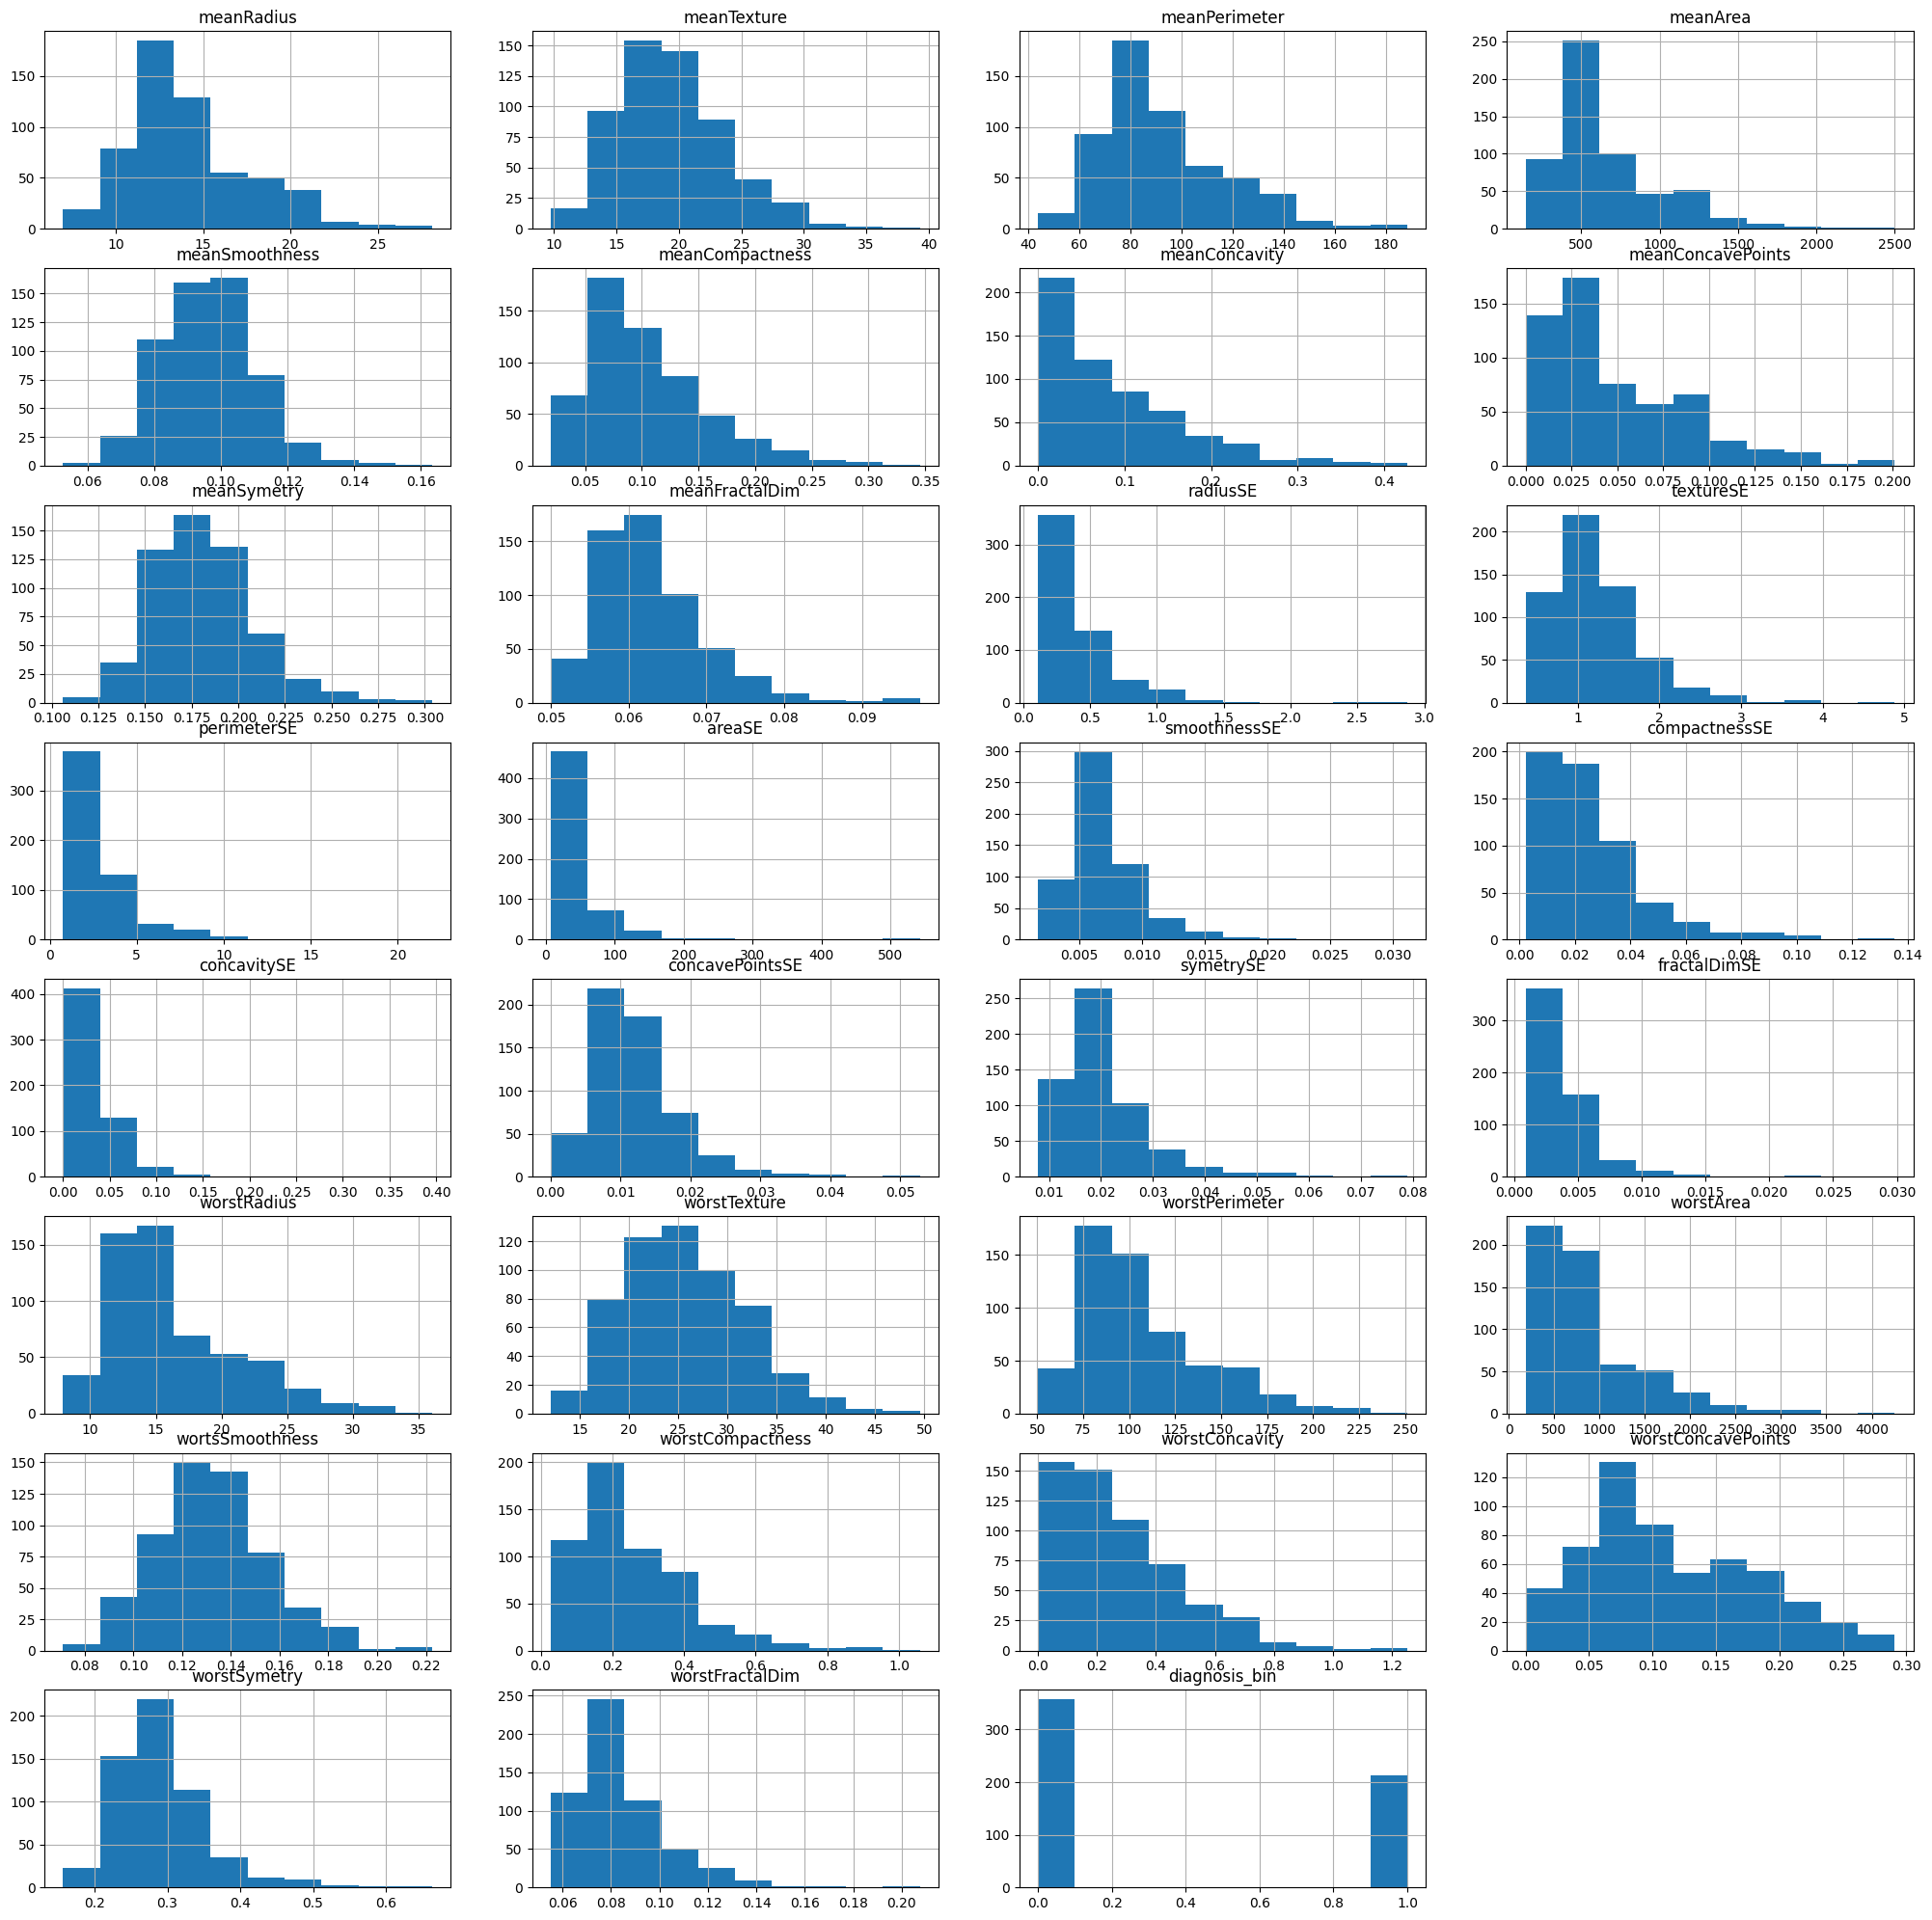

In [ ]:
dataSelect=data.iloc[:,2:]

fig=plt.figure(figsize=(25,25))
fig.tight_layout()
i=1

for col in dataSelect.columns:
  ax=plt.subplot(8,4,i)
  dataSelect[col].hist()
  ax.set_title(str(col))
  i=i+1



In [ ]:
dataSelect.groupby('diagnosis_bin').mean().transpose()

diagnosis_bin                0            1
meanRadius           12.146524    17.462830
meanTexture          17.914762    21.604906
meanPerimeter        78.075406   115.365377
meanArea            462.790196   978.376415
meanSmoothness        0.092478     0.102898
meanCompactness       0.080085     0.145188
meanConcavity         0.046058     0.160775
meanConcavePoints     0.025717     0.087990
meanSymetry           0.174186     0.192909
meanFractalDim        0.062867     0.062680
radiusSE              0.284082     0.609083
textureSE             1.220380     1.210915
perimeterSE           2.000321     4.323929
areaSE               21.135148    72.672406
smoothnessSE          0.007196     0.006780
compactnessSE         0.021438     0.032281
concavitySE           0.025997     0.041824
concavePointsSE       0.009858     0.015060
symetrySE             0.020584     0.020472
fractalDimSE          0.003636     0.004062
worstRadius          13.379801    21.134811
worstTexture         23.515070    29.318208
worstPerimeter       87.005938   141.370330
worstArea           558.899440  1422.286321
wortsSmoothness       0.124959     0.144845
worstCompactness      0.182673     0.374824
worstConcavity        0.166238     0.450606
worstConcavePoints    0.074444     0.182237
worstSymetry          0.270246     0.323468
worstFractalDim       0.079442     0.091530

In [ ]:
dataSelect.groupby('diagnosis_bin').count()

meanRadius  meanTexture  meanPerimeter  meanArea  \
diagnosis_bin                                                     
0                     357          357            357       357   
1                     212          212            212       212   

               meanSmoothness  meanCompactness  meanConcavity  \
diagnosis_bin                                                   
0                         357              357            357   
1                         212              212            212   

               meanConcavePoints  meanSymetry  meanFractalDim  ...  \
diagnosis_bin                                                  ...   
0                            357          357             357  ...   
1                            212          212             212  ...   

               worstRadius  worstTexture  worstPerimeter  worstArea  \
diagnosis_bin                                                         
0                      357           357             357        357   
1                      212           212             212        212   

               wortsSmoothness  worstCompactness  worstConcavity  \
diagnosis_bin                                                      
0                          357               357             357   
1                          212               212             212   

               worstConcavePoints  worstSymetry  worstFractalDim  
diagnosis_bin                                                     
0                             357           357              357  
1                             212           212              212  

[2 rows x 30 columns]

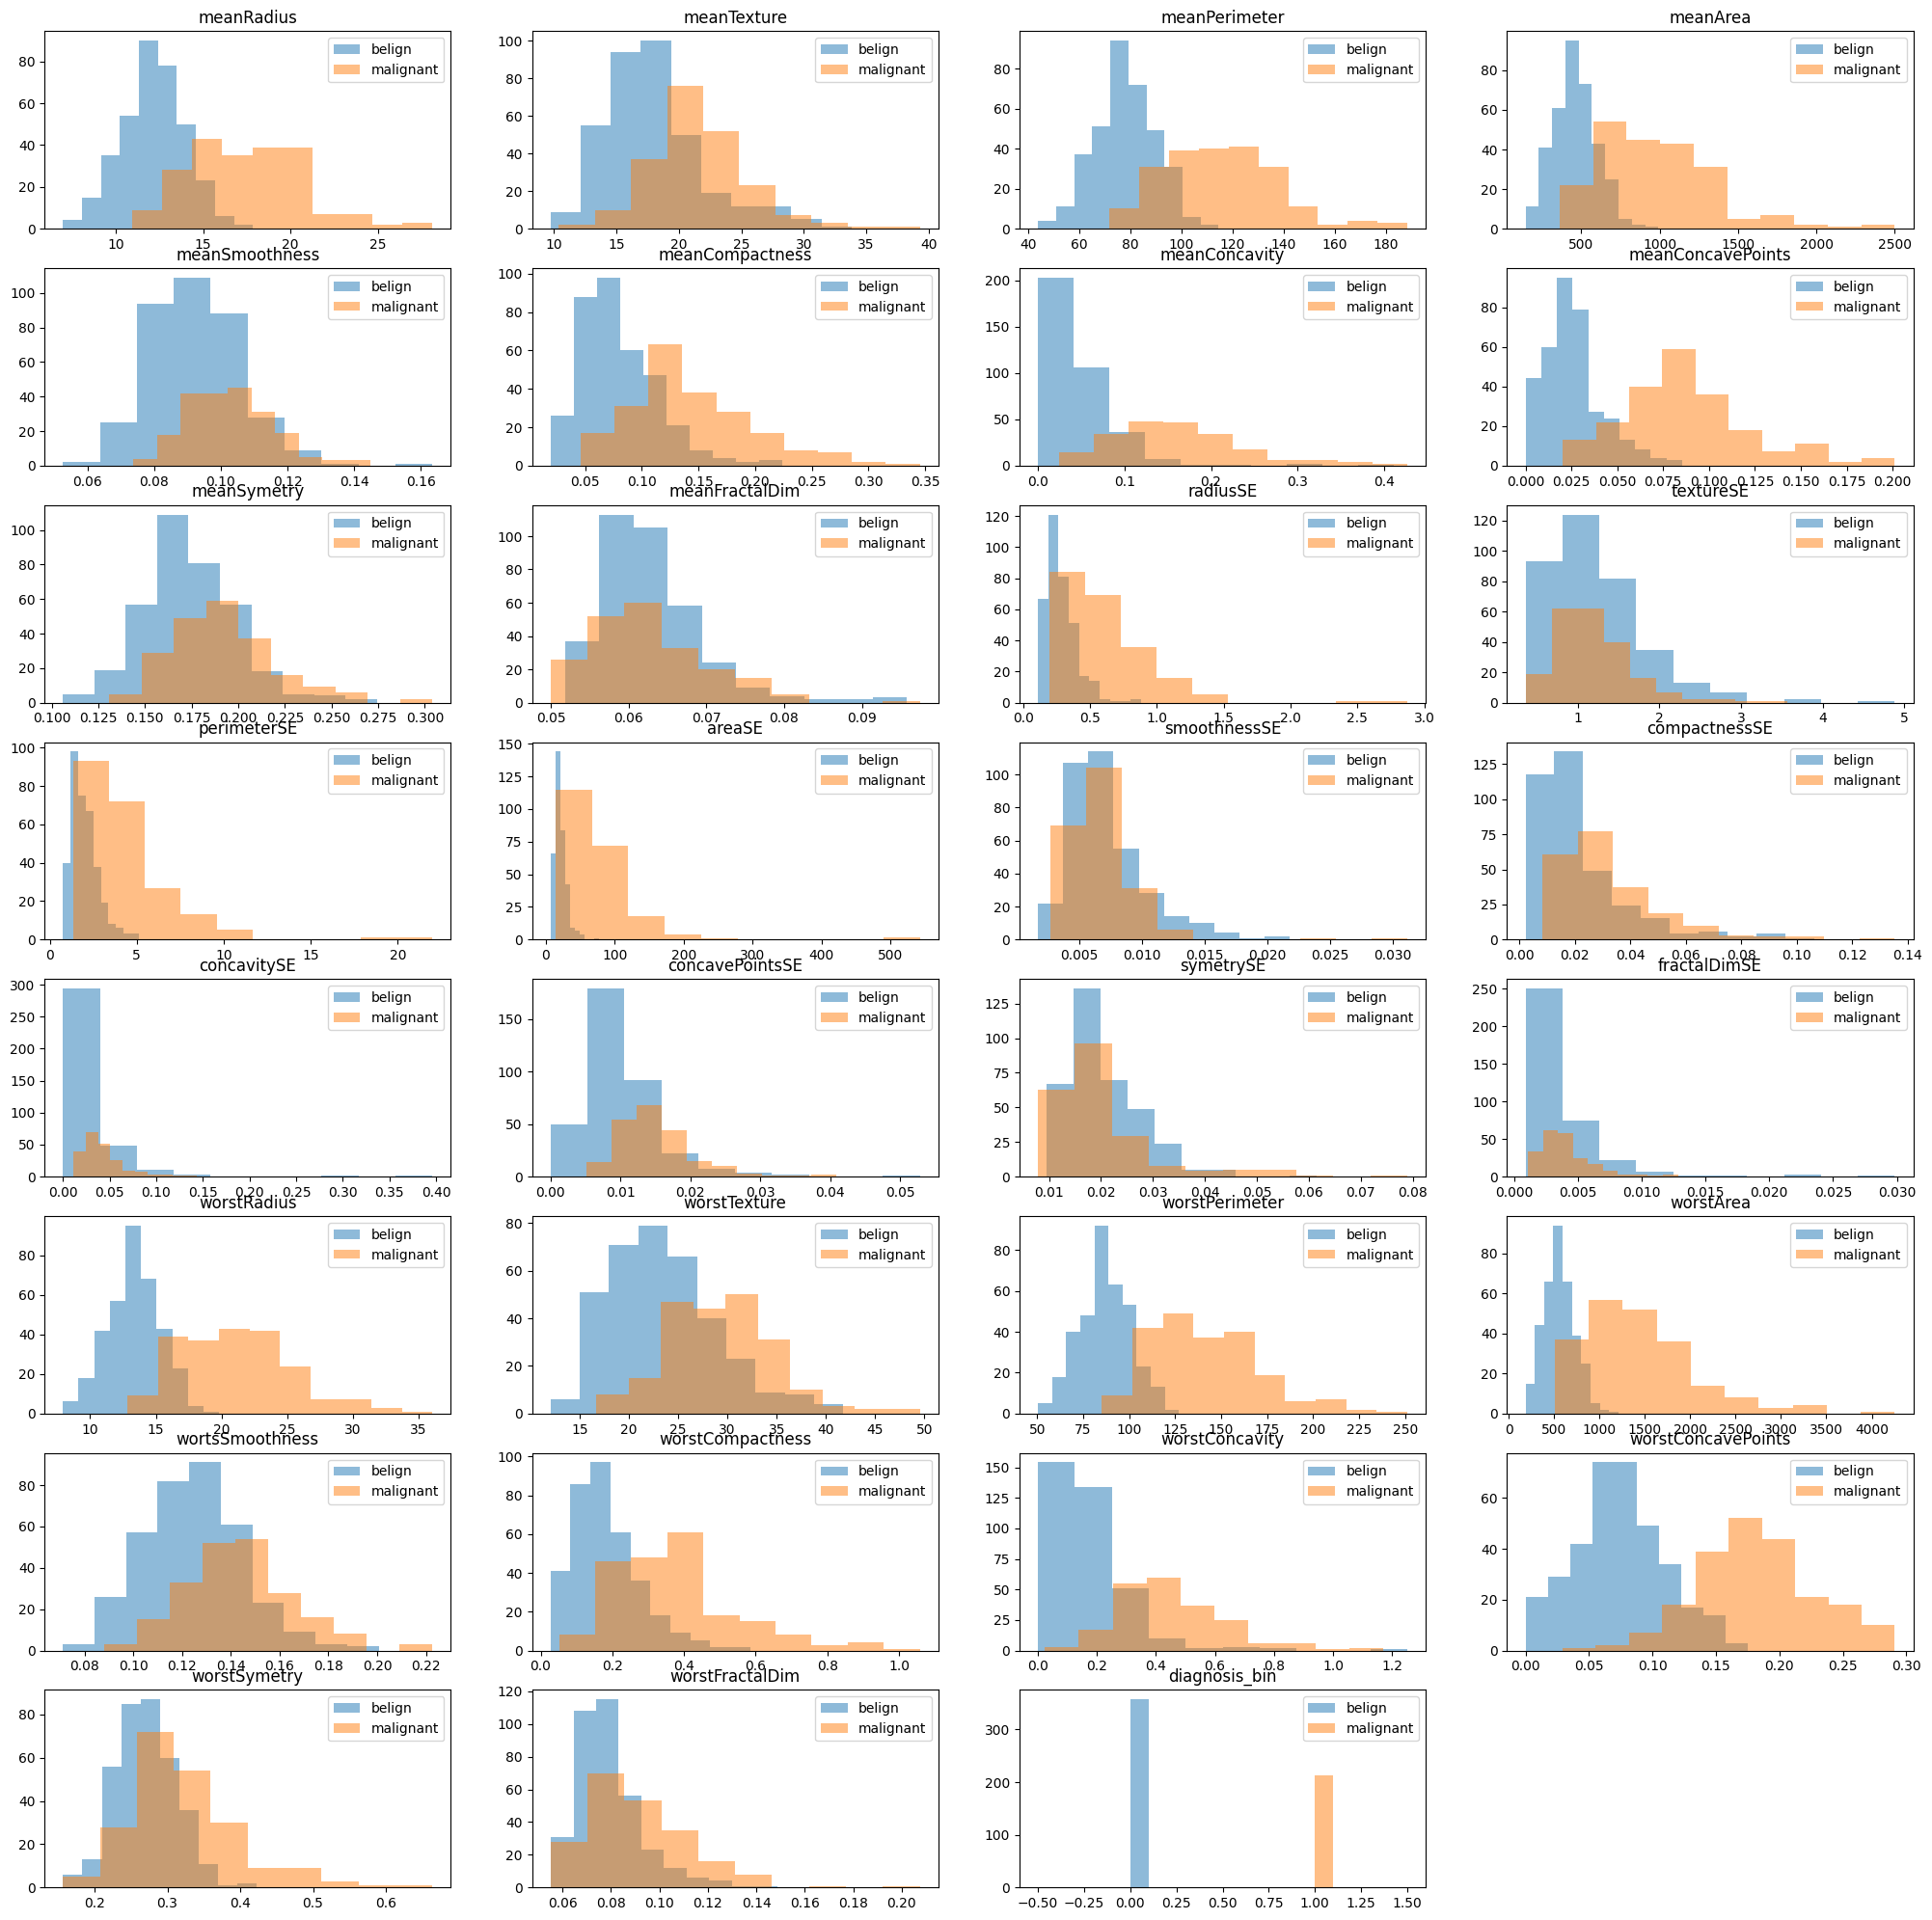

In [ ]:
#Visualización de la distribución de cada conjunto de datos (M o B) para cada variable.
bData = dataSelect[dataSelect['diagnosis_bin'] == 0]
mData = dataSelect[dataSelect['diagnosis_bin'] == 1]


fig=plt.figure(figsize=(25,25))
fig.tight_layout()
i=1

for col in dataSelect.columns:
  ax=plt.subplot(8,4,i)
  plt.hist(bData[col], alpha=0.5, label="belign")
  plt.hist(mData[col], alpha=0.5, label="malignant")
  plt.legend()
  ax.set_title(str(col))
  i=i+1



<Axes: >

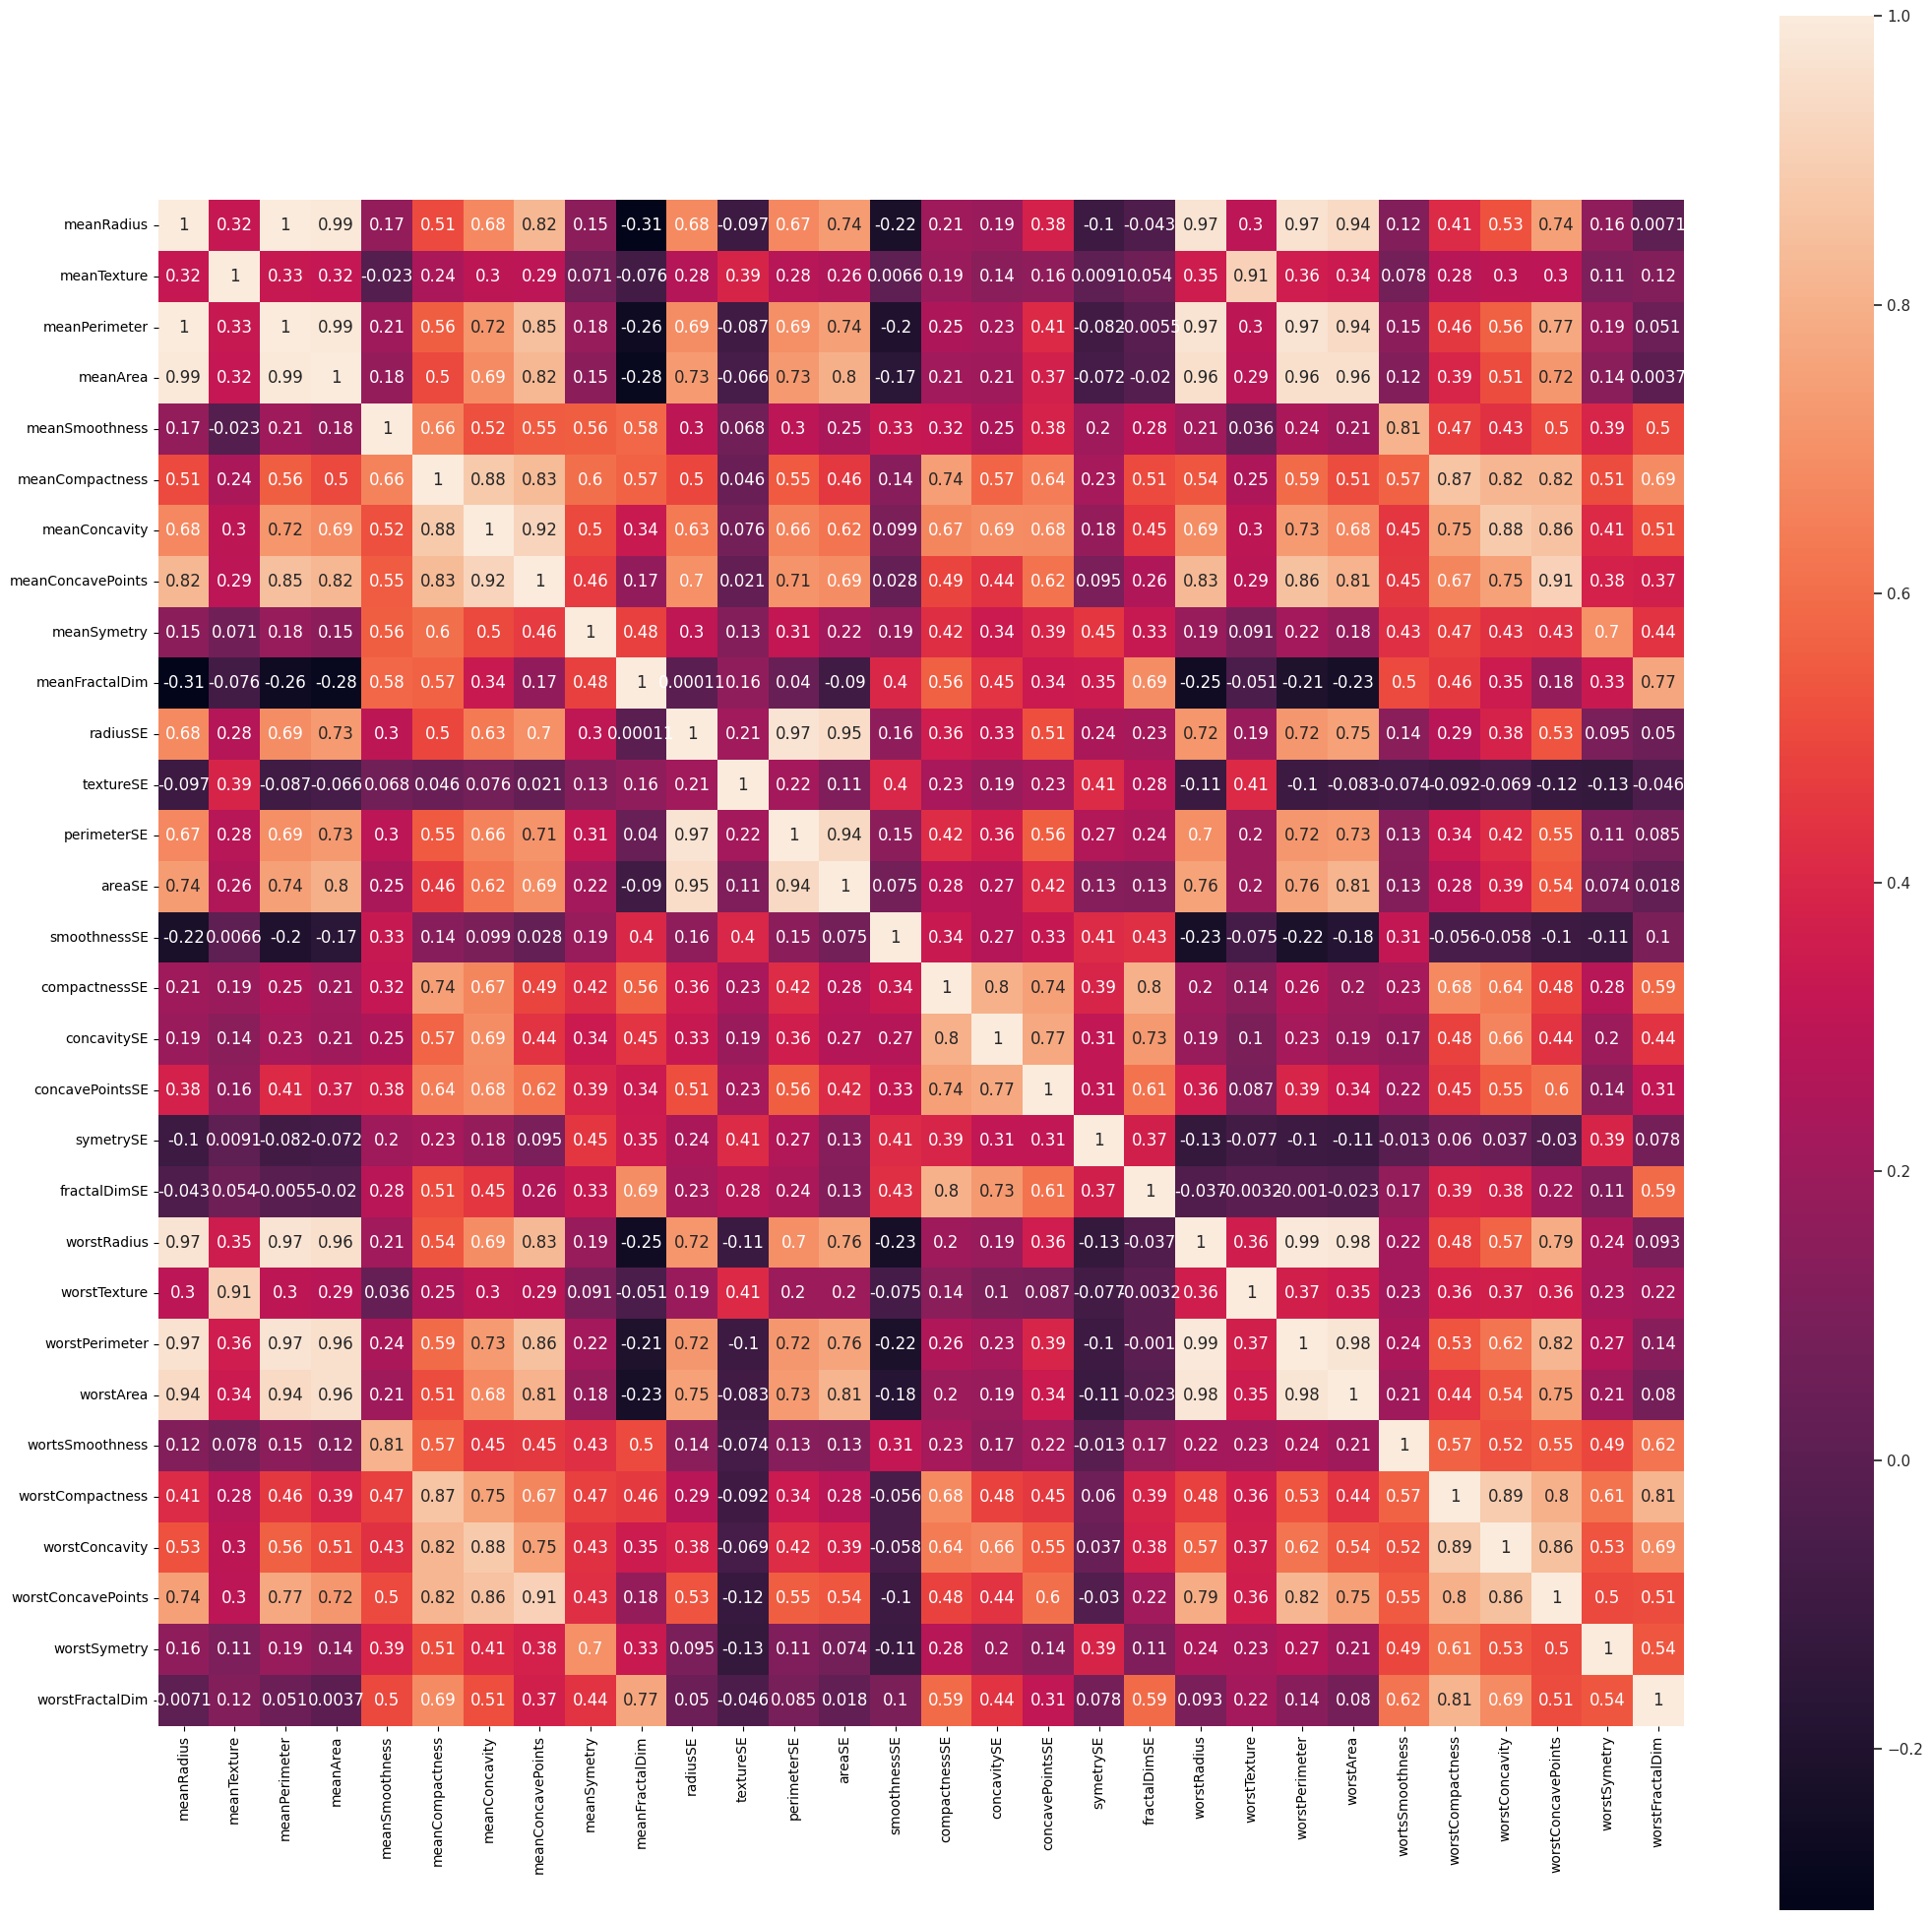

In [ ]:
#calculo de correlaciones
fig, ax = plt.subplots(figsize=(25,25))
sns.set()
sns.heatmap(dataSelect.drop('diagnosis_bin',axis=1).corr(), square=True, annot=True,ax=ax)

<Axes: >

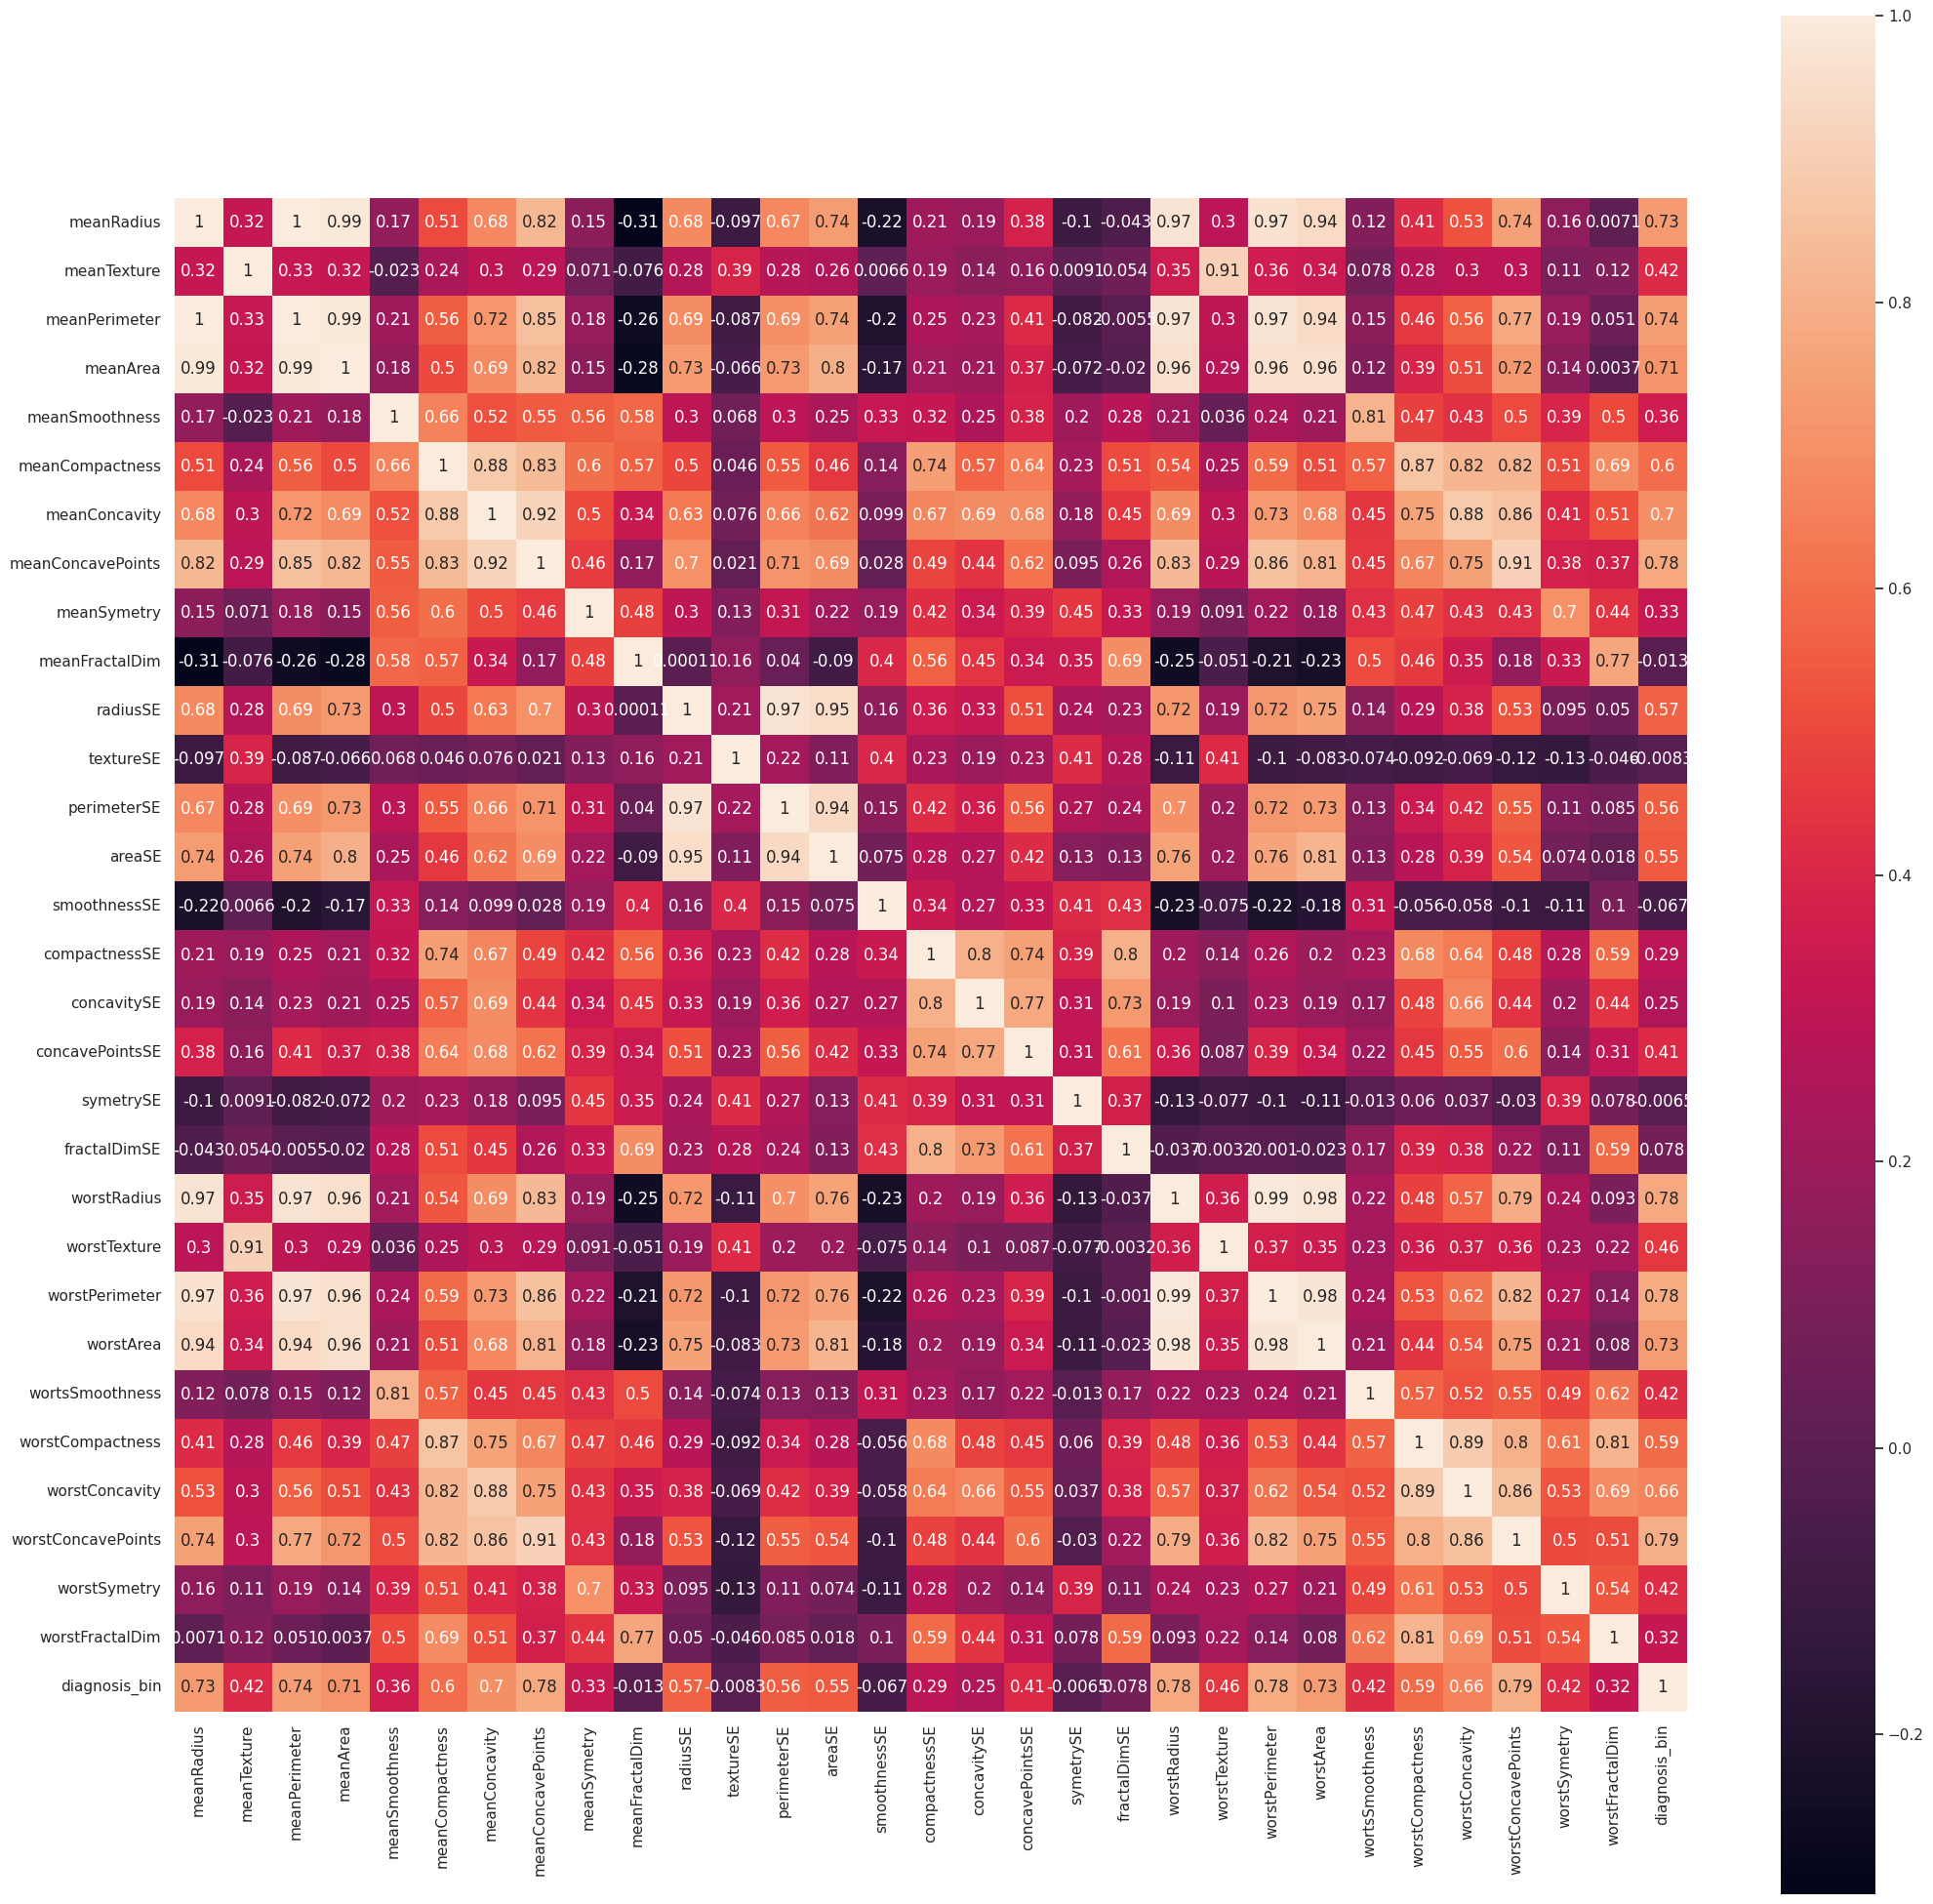

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
sns.set()
sns.heatmap(dataSelect.corr(), square=True, annot=True,ax=ax)

In [ ]:
#se combinan varias variables y después se calculará de nuevo la matriz de correlación - se van a combinar las variables mean con worst, calculando la media de cada par de variables para cada característiac

data['radius']=(data['meanRadius']+data['worstRadius'])/2

data['texture']=(data['meanTexture']+data['worstTexture'])/2

data['perimeter']=(data['meanPerimeter']+data['worstPerimeter'])/2

data['area']=(data['meanArea']+data['worstArea'])/2

data['smoothness']=(data['meanSmoothness']+data['wortsSmoothness'])/2

data['compactness']=(data['meanCompactness']+data['worstCompactness'])/2

data['concavity']=(data['meanConcavity']+data['worstConcavity'])/2

data['concavePoints']=(data['meanConcavePoints']+data['worstConcavePoints'])/2

data['symetry']=(data['meanSymetry']+data['worstSymetry'])/2

data['fractalDim']=(data['meanFractalDim']+data['worstFractalDim'])/2

<Axes: >

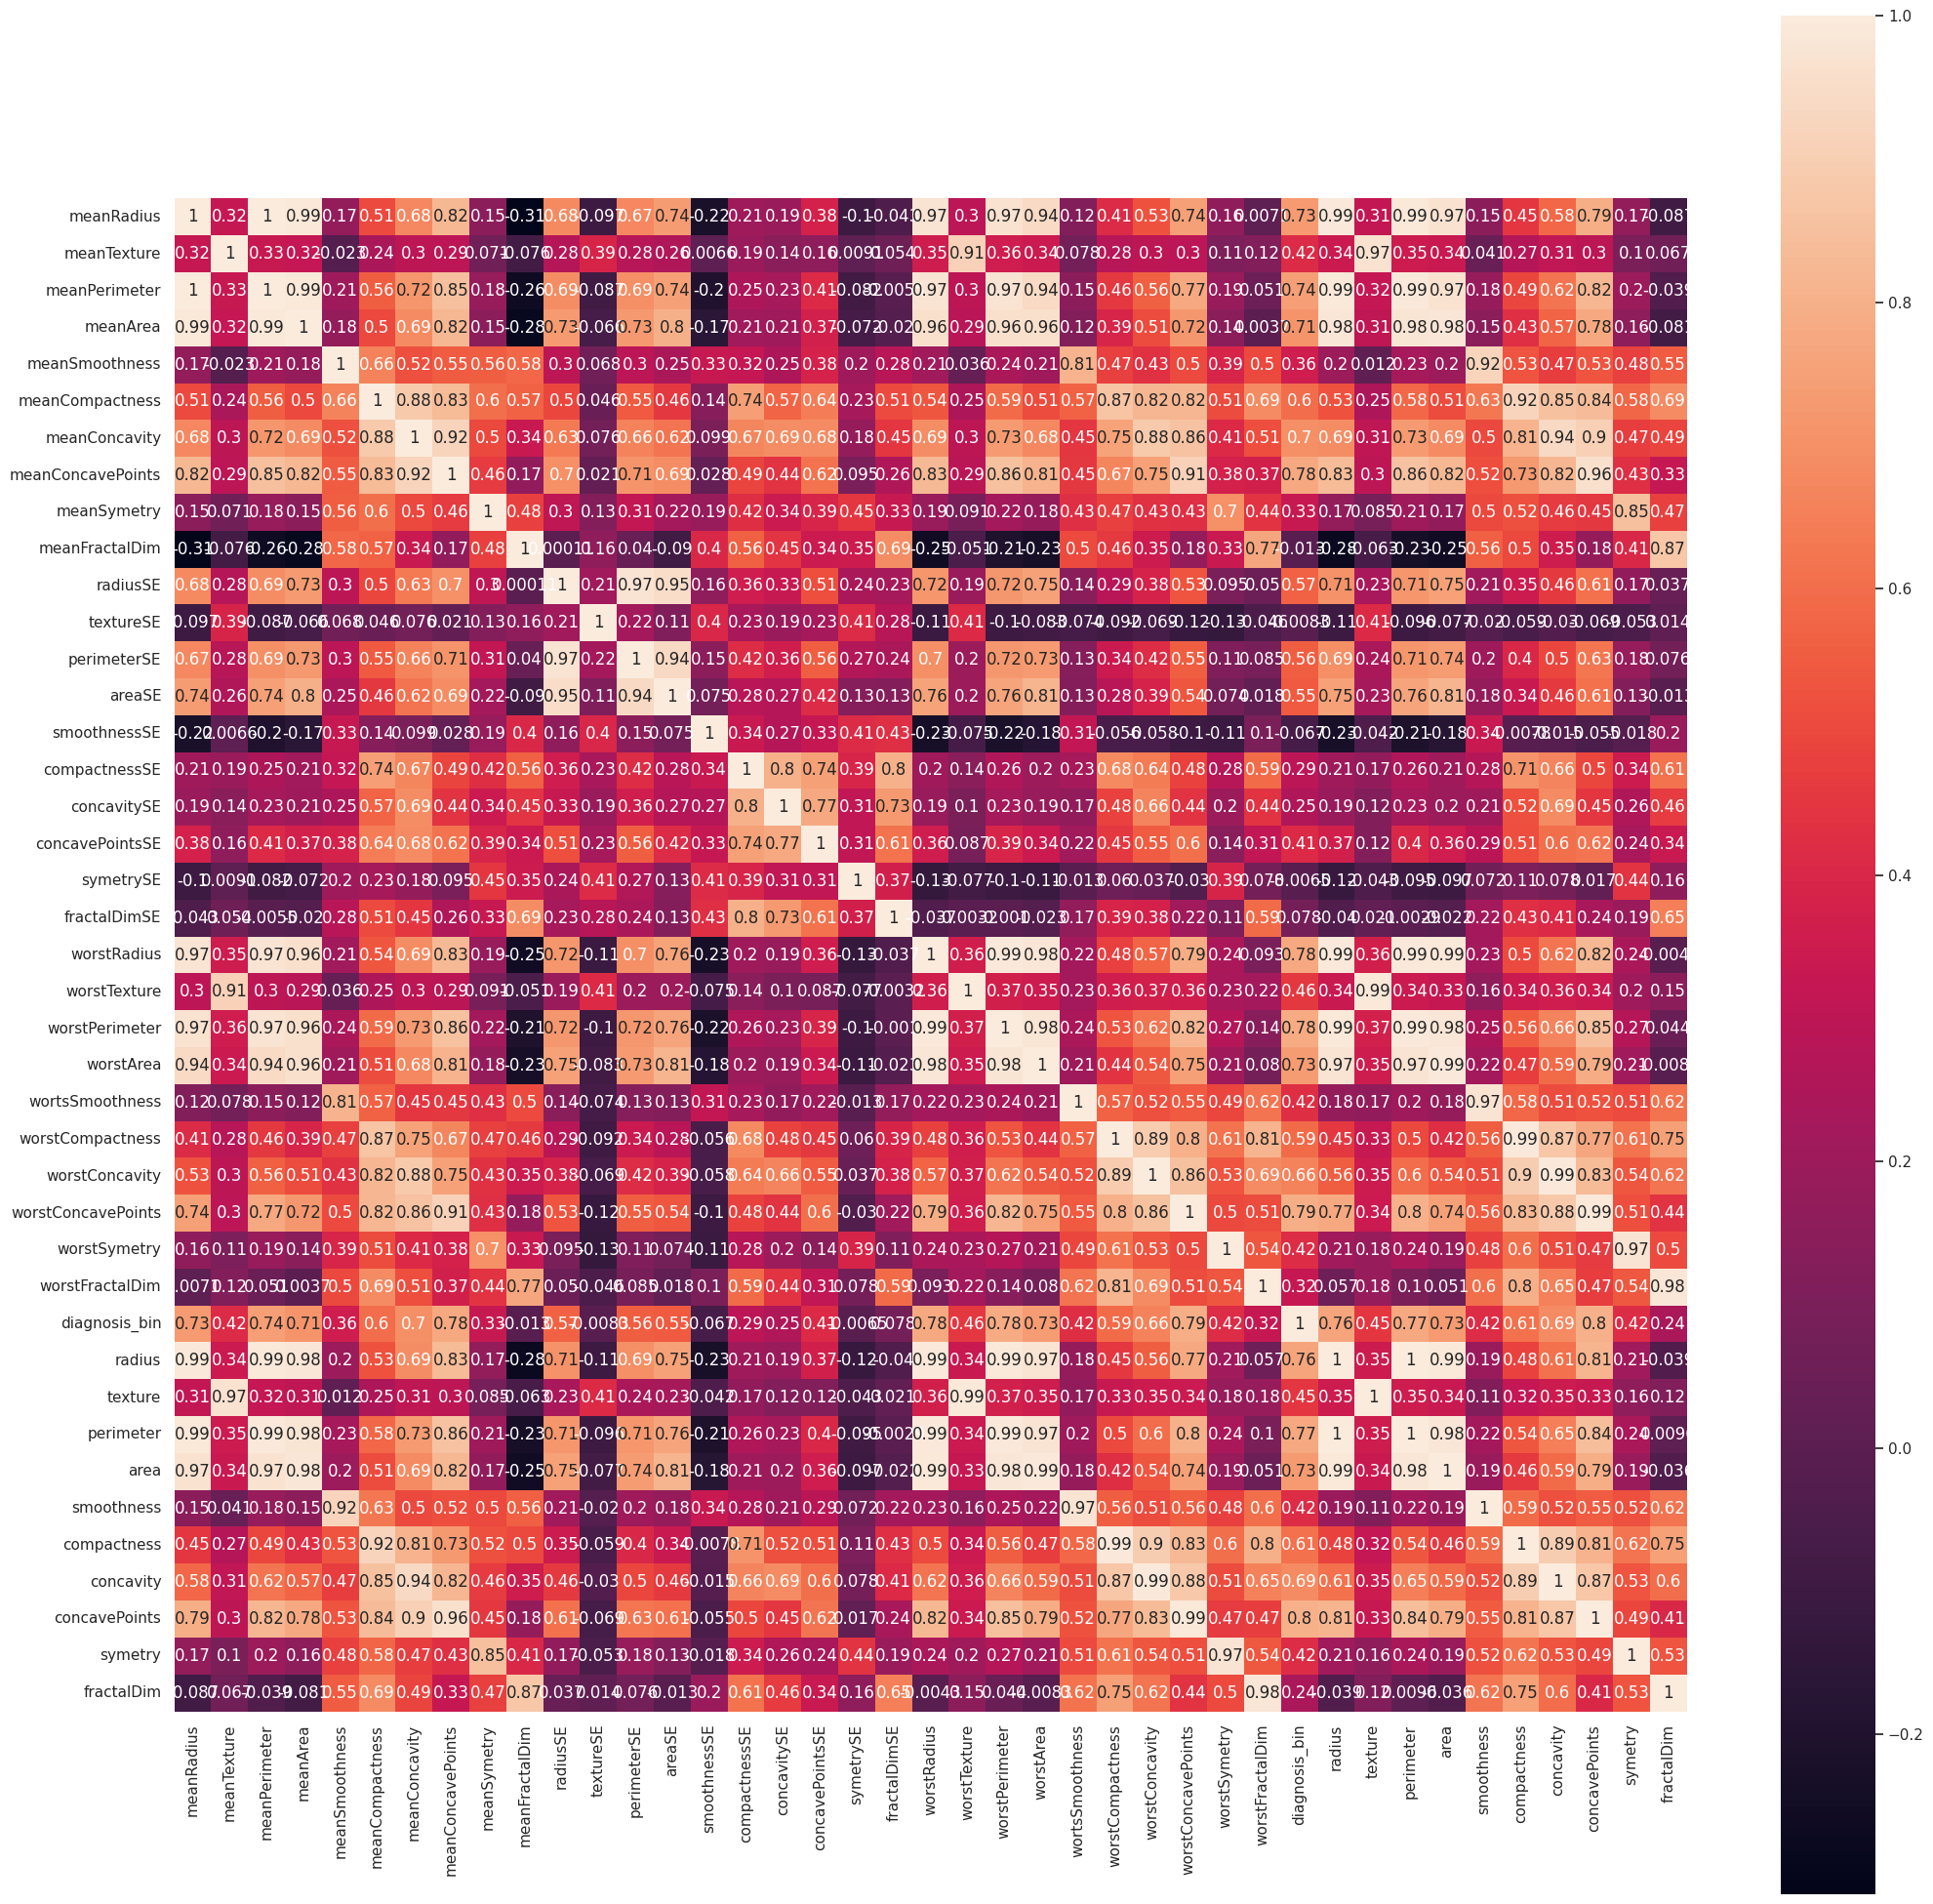

In [ ]:
#se vuelve a calcular la matriz de correlación
dataSelect2=data.iloc[:,2:43]

fig, ax = plt.subplots(figsize=(25,25))
sns.set()
sns.heatmap(dataSelect2.corr(), square=True, annot=True,ax=ax)

In [ ]:
#selección final de variables
selected_variables = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concavePoints','symetry','fractalDim','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concavePointsSE','symetrySE','fractalDimSE']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#dividir el conjunto de datos para la validación

X_train, X_train_test, y_train, y_train_test = train_test_split(data[selected_variables], data['diagnosis_bin'], test_size=0.2, random_state=seed)

In [ ]:
# Normalización con StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_train_test_norm=scaler.transform(X_train_test)

X_train_norm

array([[-0.67832705,  0.83683244, -0.68680032, ..., -0.6795386 ,
        -0.29866742,  0.07199668],
       [ 1.76780055,  2.03293325,  2.01714407, ...,  0.55169871,
        -0.15494545,  0.56933608],
       [-0.85165545, -1.54833921, -0.88398124, ..., -0.56320878,
         0.38640731, -0.84667804],
       ...,
       [ 0.80228811,  0.46022639,  0.82738042, ...,  0.74397939,
        -0.25555082,  0.17177637],
       [-0.54405857, -0.12828333, -0.54515342, ..., -0.67841696,
        -0.06032848, -0.77691021],
       [-0.55870604, -0.18452317, -0.46571869, ...,  1.07085655,
         4.2669005 ,  0.32885143]])

# ENTRENAMIENTO DE MODELOS Y PREDICCIÓN

## Regression Logística

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay, RocCurveDisplay,PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# Nombre del modelo: "RegressionLogistica"
model = LogisticRegression()
model.fit(X_train_norm, y_train)
y_pred_test = model.predict(X_train_test_norm)



In [ ]:
y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

val=accuracy_score(y_pred_test,y_train_test)

print(f"Precisión de la regresión logística con parámetros por defecto: {val*100:.4f}")

Precisión de la regresión logística con parámetros por defecto: 98.2456


In [ ]:
# Calcula el MAE
mae = mean_absolute_error(y_train_test, y_pred_test)
print("MAE:", mae)

MAE: 0.017543859649122806


In [ ]:
cmRLA = confusion_matrix(y_train_test,y_pred_test)

<Figure size 700x500 with 0 Axes>

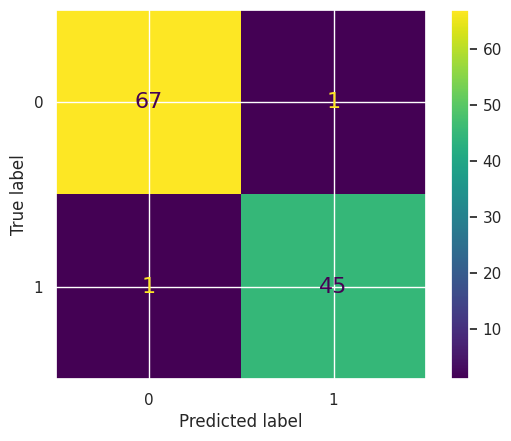

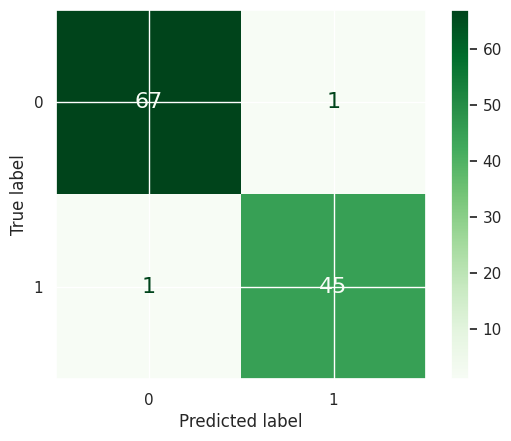

In [ ]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_train_test,y_pred_test)
disp.plot(cmap='Greens')

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred_test)

print("AUC Score:", auc_score1)

AUC Score: 0.9817774936061381


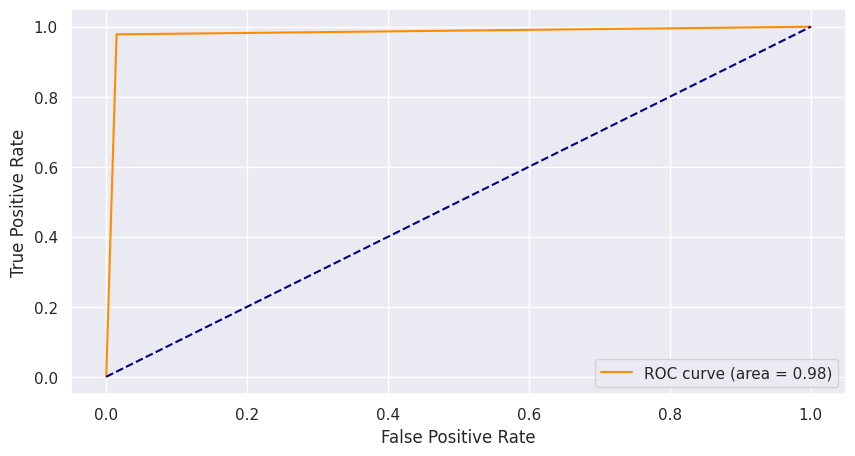

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred_test)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## KNN

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# reseteamos el index con el fin de evitar problemas en la validación cruzada
data.reset_index(drop = True, inplace = True)

Min Value uniform : 0.04038220551378446 (7)
Min Value distance : 0.03511904761904762 (8)


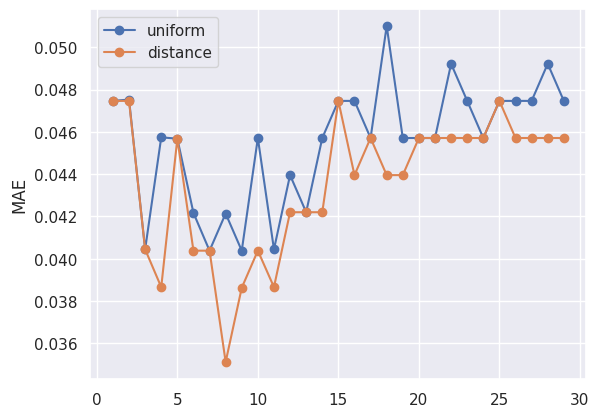

In [ ]:
#Se realiza una evaluación para determinar cuales podrían ser los mejores parámetros.

selected_variablesKNN = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concavePoints','symetry','fractalDim','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concavePointsSE','symetrySE','fractalDimSE','diagnosis_bin']
cv = KFold(n_splits = 10, shuffle = True, random_state=seed)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(data[selected_variablesKNN]):
          # División train test aleatoria
          f_train = data[selected_variablesKNN].loc[train_fold]
          f_train
          f_test = data[selected_variablesKNN].loc[test_fold]
          #normalización con StandarScaler
          f_train_norm = scaler.fit_transform(f_train.drop(['diagnosis_bin'], axis=1))
          f_test_norm=scaler.transform(f_test.drop(['diagnosis_bin'], axis=1))
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train_norm,
                               y = f_train['diagnosis_bin'])
          y_pred = knn.predict(X = f_test_norm)
          # evaluación del modelo
          mae = mean_absolute_error(f_test['diagnosis_bin'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')

plt.legend()
plt.show()

In [ ]:
# Nombre del modelo: "KNN-U"
# constructor
n_neighbors = 7
weights = 'uniform' # todos los vecinos tienen la misma importancia
knnU = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)

knnU.fit(X_train_norm, y_train)
y_pred_test = knnU.predict(X_train_test_norm)

#calculo del MAE validación interna
mae = mean_absolute_error(y_train_test, y_pred_test)
print ('MAE', mae)
y_pred_test

MAE 0.05263157894736842


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [ ]:
val = accuracy_score(y_pred_test,y_train_test)
print(f"Precisión para el modelo KNN con parametro 'uniform' y con k=7: , {val*100:.4f}")

Precisión para el modelo KNN con parametro 'uniform' y con k=7: , 94.7368


In [ ]:
cmKNNU = confusion_matrix(y_train_test,y_pred_test)

<Figure size 700x500 with 0 Axes>

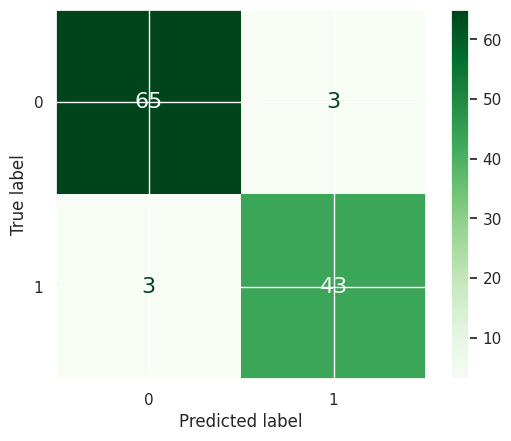

In [ ]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cmKNNU,display_labels=knn.classes_,)
disp.plot(cmap='Greens')

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred_test)
print("AUC Score:", auc_score1)

AUC Score: 0.9453324808184145


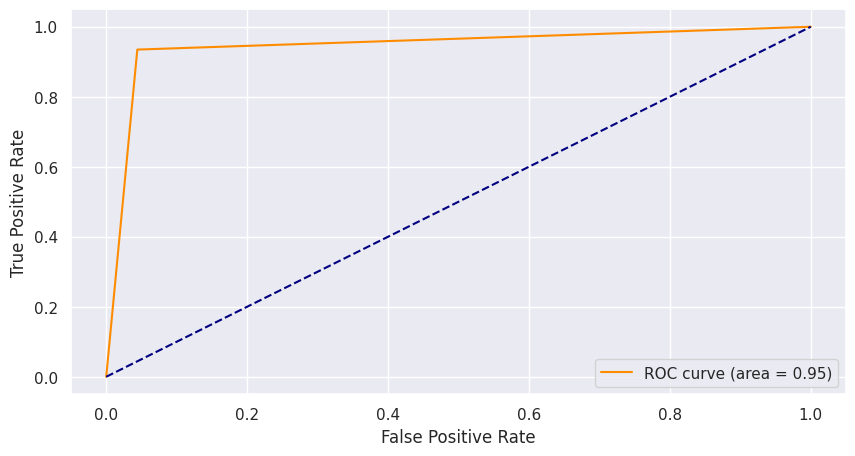

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred_test)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

KNN por distancia

In [ ]:
# Nombre del modelo: "KNN-D"
# constructor
n_neighbors = 8
weights = 'distance' # los vecinos más cercanos tienen mayor peso
knnD = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)
# fit and predict
knnD.fit(X_train_norm, y_train)
y_pred_test = knnD.predict(X_train_test_norm)

#calculo del MAE validación interna
mae = mean_absolute_error(y_train_test, y_pred_test)
print ('MAE', mae)
y_pred_test

MAE 0.06140350877192982


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [ ]:
val = accuracy_score(y_pred_test,y_train_test)
print(f"Accuracy for KNN with K = 10, {val*100:.4f}")

Accuracy for KNN with K = 10, 93.8596


In [ ]:
cmKNNU = confusion_matrix(y_train_test,y_pred_test)

<Figure size 700x500 with 0 Axes>

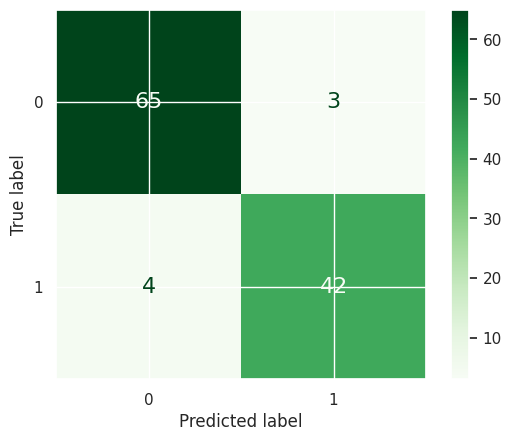

In [ ]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cmKNNU,display_labels=knn.classes_,)
disp.plot(cmap='Greens')

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred_test)
print("AUC Score:", auc_score1)

AUC Score: 0.934462915601023


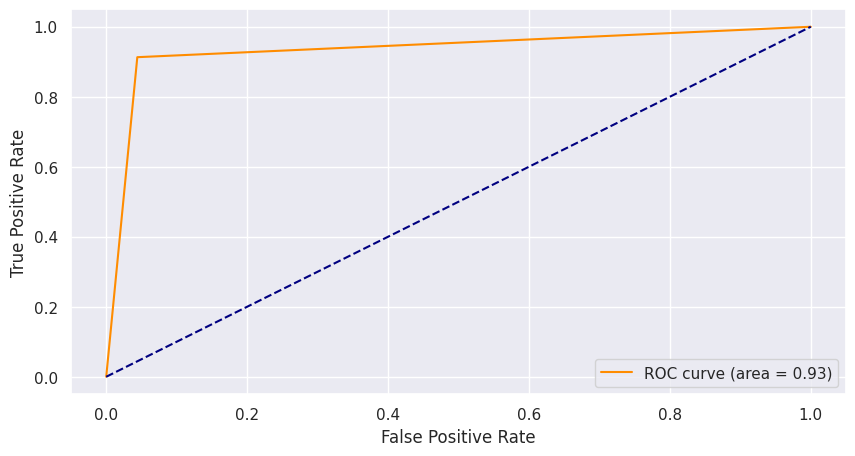

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred_test)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## ARBOLES DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Min Value 0.06331453634085213 (3)


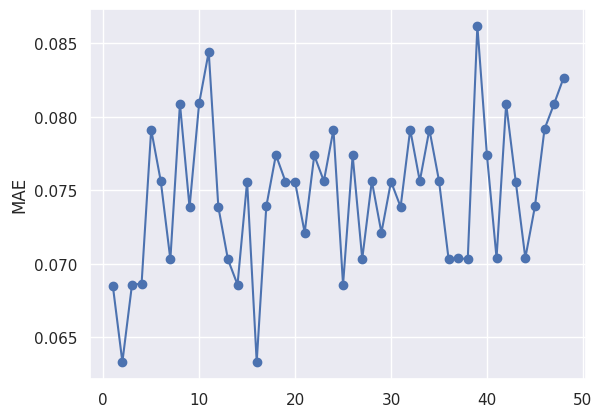

In [ ]:
# CROSS VALIDATION ANALYSIS para evitar sobreaprendizaje
from sklearn.metrics import mean_absolute_error

selected_variablesAD = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concavePoints','symetry','fractalDim','radiusSE','textureSE','perimeterSE','areaSE','smoothnessSE','compactnessSE','concavitySE','concavePointsSE','symetrySE','fractalDimSE','diagnosis_bin']
# reset index
data.reset_index(drop = True, inplace = True)

cv = KFold(n_splits = 10, shuffle = True, random_state=seed)

total_scores = []
for i in range(2, 50):
   classifier = DecisionTreeClassifier(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(data[selected_variablesAD]):
      # División train test aleatoria
      f_train = data[selected_variablesAD].loc[train_fold]
      f_test = data[selected_variablesAD].loc[test_fold]
      # entrenamiento y ejecución del modelo
      classifier.fit( X = f_train.drop(['diagnosis_bin'], axis=1),
                           y = f_train['diagnosis_bin'])
      y_pred = classifier.predict(X = f_test.drop(['diagnosis_bin'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['diagnosis_bin'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('MAE')

plt.show()

In [ ]:
# Nombre del modelo: "ArbolesDecisionA"
# constructor
modelADA = DecisionTreeClassifier(max_depth = 3)

modelADA.fit( X_train[selected_variables], y_train)
y_pred = modelADA.predict(X_train_test[selected_variables])
mae = mean_absolute_error(y_train_test, y_pred)
print ('MAE', mae)
y_pred

MAE 0.03508771929824561


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [ ]:
# accuracy of decision tree model
val = accuracy_score(y_pred,y_train_test)
print(f"Decision Tree Model Accuracy: {val*100:.4f}")


Decision Tree Model Accuracy: 96.4912


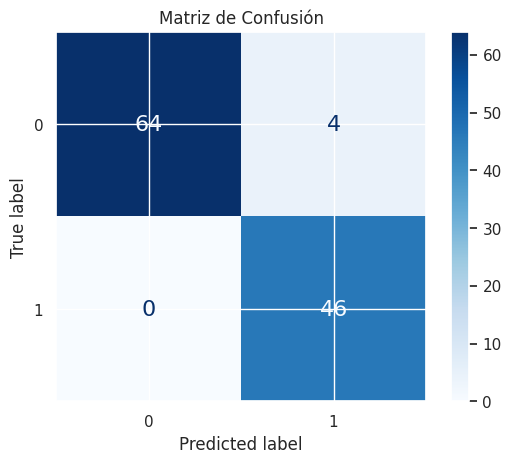

In [ ]:
cm = confusion_matrix(y_train_test, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred)
print("AUC Score:", auc_score1)

AUC Score: 0.9705882352941176


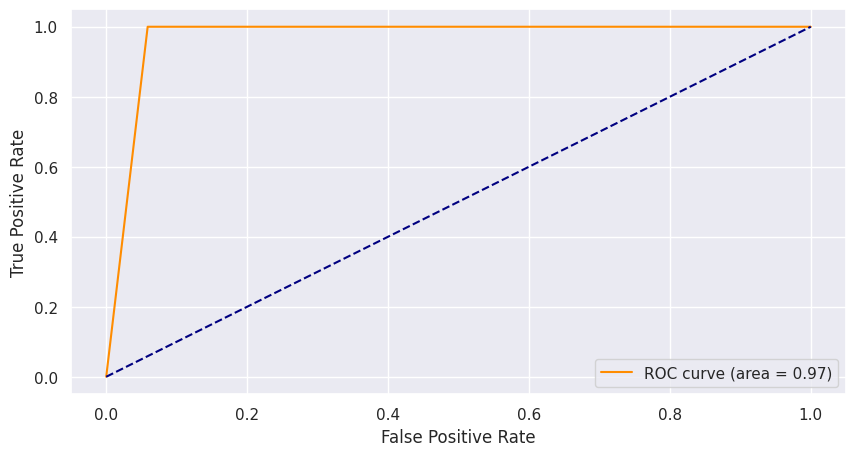

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Arboles de decisión B

In [ ]:
#se optimizan los hiperparametros para intentar mejorar los resultados de los AD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
# reset index
data.reset_index(drop = True, inplace = True)

X=data[selected_variables]
y=data["diagnosis_bin"]

# Nombre del modelo: "ArbolesDecisionB"
modelADB = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}


# se inicializa y realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelADB, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=seed, n_jobs=-1)
random_search.fit(X, y)

# se imprimen los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros encontrados:
{'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
#se refina el resultado obtenido con un grid search
from sklearn.model_selection import GridSearchCV


X=data[selected_variables]
y=data["diagnosis_bin"]
# Definir la cuadrícula de hiperparámetros basada en los mejores parámetros encontrados por la búsqueda aleatoria
param_grid = {
    'max_depth': [random_search.best_params_['max_depth'], None],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']],
    'max_features': [random_search.best_params_['max_features']],
    'criterion': [random_search.best_params_['criterion']]
}

# se inicializa y realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelADB, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)


# se imprimen los mejores hiperparámetros encontrados por la búsqueda en cuadrícula
print("Mejores hiperparámetros encontrados por la búsqueda en cuadrícula:")
print(grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros encontrados por la búsqueda en cuadrícula:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 9}


In [ ]:
# Nombre del modelo: "ArbolesDecisionB"
#constructor
modelADBHP = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=5, min_samples_split=9)

modelADBHP.fit( X_train[selected_variables], y_train)
y_pred = modelADBHP.predict(X_train_test[selected_variables])
mae = mean_absolute_error(y_train_test, y_pred)
print ('MAE', mae)
y_pred

MAE 0.07017543859649122


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1])

In [ ]:
# accuracy of decision tree model
val = accuracy_score(y_pred,y_train_test)
print(f"Decision Tree Model Accuracy: {val*100:.4f}")

Decision Tree Model Accuracy: 92.9825


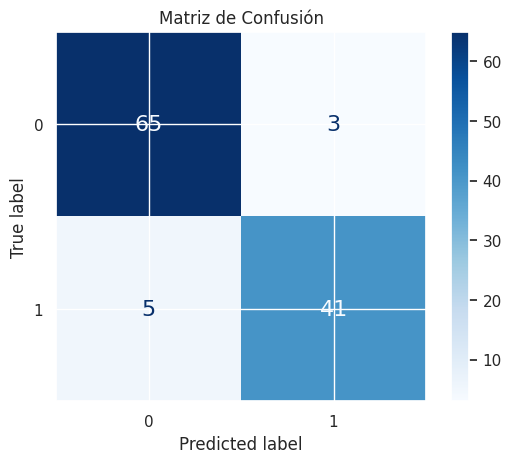

In [ ]:
cm = confusion_matrix(y_train_test, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred)
print("AUC Score:", auc_score1)

AUC Score: 0.9235933503836318


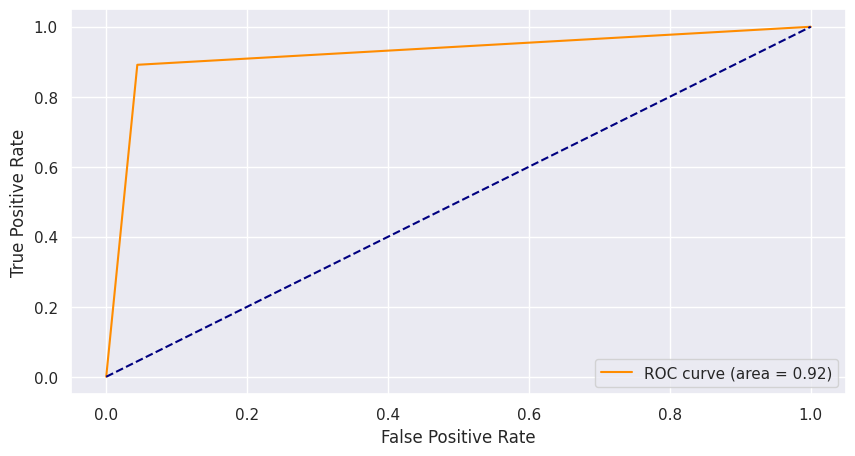

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## RANDOM FOREST

In [ ]:
#se optimizan los hiperparametros para intentar mejorar los resultados de los AD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris

# reset index
data.reset_index(drop = True, inplace = True)

X=data[selected_variables]
y=data["diagnosis_bin"]

# Nombre del modelo: "RandomForestA"
modelRFA = RandomForestClassifier()

param_grid = {
    'n_estimators': list(range(1, 200)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}


# se inicializa y realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelRFA, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=seed, n_jobs=-1)
random_search.fit(X, y)

# se imprimen los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros encontrados:
{'n_estimators': 112, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy'}


In [ ]:
#se refina el resultado obtenido con un grid search
from sklearn.model_selection import GridSearchCV


X=data[selected_variables]
y=data["diagnosis_bin"]
# Definir la cuadrícula de hiperparámetros basada en los mejores parámetros encontrados por la búsqueda aleatoria
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators']],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']],
    'max_features': [random_search.best_params_['max_features']],
    'criterion': [random_search.best_params_['criterion']]
}

# se inicializa y realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelRFA, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)


# se imprimen los mejores hiperparámetros encontrados por la búsqueda en cuadrícula
print("Mejores hiperparámetros encontrados por la búsqueda en cuadrícula:")
print(grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores hiperparámetros encontrados por la búsqueda en cuadrícula:
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 112}


In [ ]:
# Nombre del modelo: "RandomForestA"
# constructor
classifier = RandomForestClassifier(n_estimators= 112,
                  criterion='entropy',max_features= 'sqrt' ,min_samples_split=5,min_samples_leaf=1, random_state=seed)
# fit and predict

classifier.fit( X_train[selected_variables], y_train)
y_pred = classifier.predict(X_train_test[selected_variables])
mae = mean_absolute_error(y_train_test, y_pred)
print ('MAE', mae)


MAE 0.008771929824561403


In [ ]:
# accuracy of random forest model
val = accuracy_score(y_pred,y_train_test)
print(f"Random Forest Model Accuracy: {val*100:.4f}")

Random Forest Model Accuracy: 99.1228


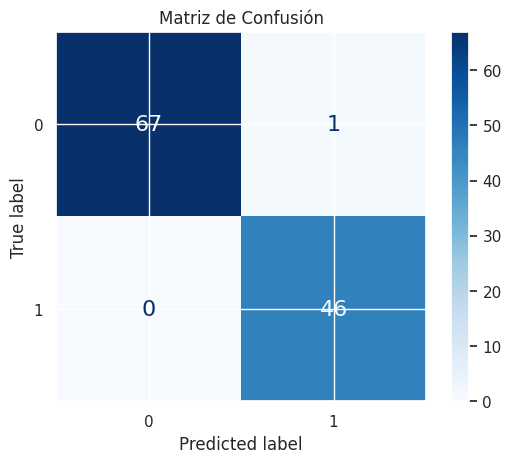

In [ ]:
cm = confusion_matrix(y_train_test, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_train_test,y_pred)
print("AUC Score:", auc_score1)

AUC Score: 0.9926470588235294


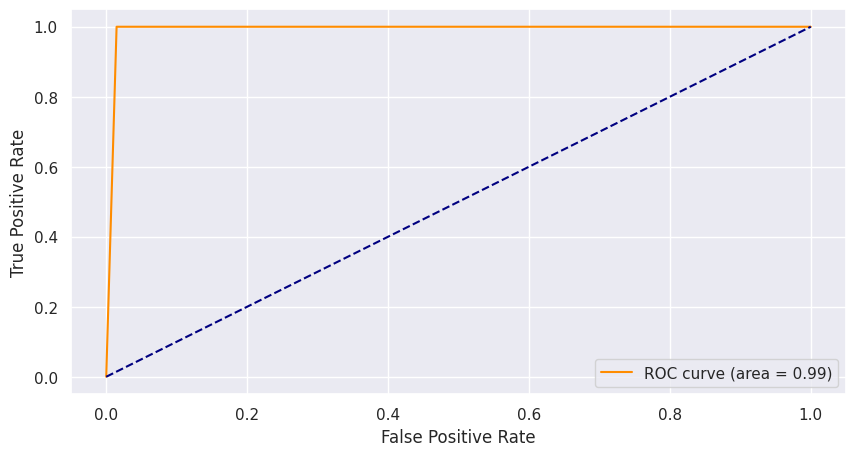

In [ ]:
fpr_, tpr_, thresholds_ = roc_curve(y_train_test,y_pred)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()